In [1]:
import data_handler
import model as M
import trainer as T

import torch as th
import numpy as np

import random
random.seed(42)

In [2]:
from IPython import display
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
# import seaborn as sns
import time

%matplotlib inline
th.multiprocessing.set_sharing_strategy('file_system')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
dataset = data_handler.DataSet(
    'data/raw/training2017/REFERENCE.csv', data_handler.load_crop,
    path='data/raw/training2017/', crop_len=3000,
    remove_noise=True, tokens='NAO')
train_set, eval_set = dataset.disjunct_split(.8)

train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=16, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)

test_producer = th.utils.data.DataLoader(
    dataset=eval_set, batch_size=128,
    num_workers=0, collate_fn=data_handler.batchify)

In [4]:
data = iter(train_producer).next()
in_channels = data['x'].size()[1]

In [5]:
FCN = M.BaseLineFCN(in_channels, [2, 4, 2])
FCN_trainer = T.trainer(FCN, 'ckpt/FCN')
FCN_trainer(train_producer, test_producer, epochs=4)

[1, 100] sample/sec 2017.16
[1, 200] sample/sec 1933.69
[1, 300] sample/sec 2047.81
[1, 400] sample/sec 2015.22
Train acc: 
 0.4857  0.0000  0.0305
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 140.95
 0.4998  0.0176  0.2310
[torch.FloatTensor of size 1x3]

epoch time:       0.16 min
       ETL:       0.48 min
----------------------------------------
[2, 100] sample/sec 2101.95
[2, 200] sample/sec 2157.36
[2, 300] sample/sec 2096.56
[2, 400] sample/sec 2107.76
Train acc: 
 0.3893  0.2512  0.1756
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 146.27
 0.0000  0.5314  0.1795
[torch.FloatTensor of size 1x3]

epoch time:       0.15 min
       ETL:       0.30 min
----------------------------------------
[3, 100] sample/sec 2155.35
[3, 200] sample/sec 2145.84
[3, 300] sample/sec 2157.22
[3, 400] sample/sec 2131.05
Train acc: 
 0.1030  0.4809  0.3278
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 146.27
 0.3093  0.5462  0.3551
[torch.FloatTensor of si

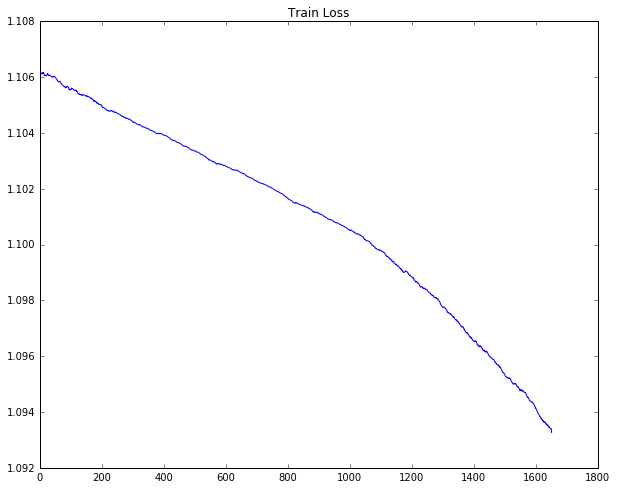

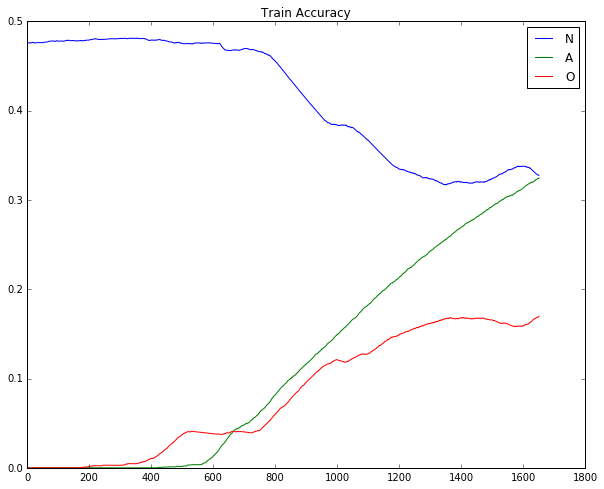

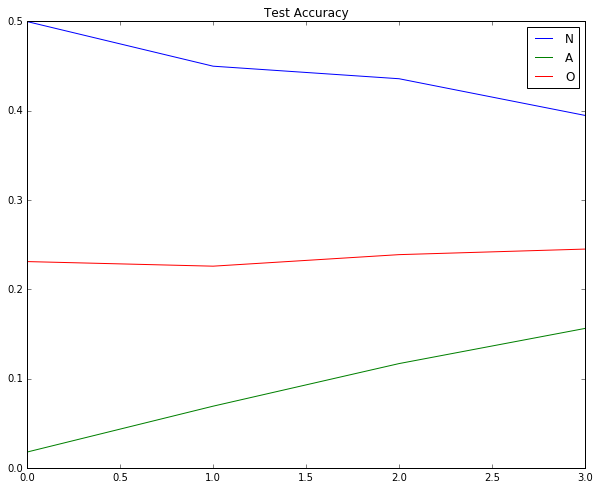

In [6]:
FCN_trainer.plot()

In [12]:
def plot(self):
        import matplotlib.pyplot as plt
        losses = self.losses
        F1 = self.train_F1
        test_F1 = self.test_F1

        plt.plot(ema(losses))
        plt.title('Train Loss')
        plt.show()

        alpha = 0.001
        plt.plot(ema(torch.cat(F1)[:, 0], alpha), label='N')
        plt.plot(ema(torch.cat(F1)[:, 1], alpha), label='A')
        plt.plot(ema(torch.cat(F1)[:, 2], alpha), label='O')
        plt.title('Train Accuracy')
        plt.legend()
        plt.show()

        alpha = 0.1
        plt.plot(ema(torch.cat(test_F1)[:, 0], alpha), label='N')
        plt.plot(ema(torch.cat(test_F1)[:, 1], alpha), label='A')
        plt.plot(ema(torch.cat(test_F1)[:, 2], alpha), label='O')
        plt.title('Test Accuracy')
        plt.legend()

        plt.show()
plot(FCN_trainer)

NameError: name 'ema' is not defined